In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/combined_for_analysis_sensationalism_jargon_categories_domain_labels.csv")
df["log_score"] = np.log(df["score"] + 1)
df.dropna(inplace=True)
df.info()
# sns light mode
sns.set_theme(style="whitegrid")

<class 'pandas.core.frame.DataFrame'>
Index: 197622 entries, 0 to 197786
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  197622 non-null  int64  
 1   year                        197622 non-null  int64  
 2   month                       197622 non-null  int64  
 3   title                       197622 non-null  object 
 4   link_flair_text             197622 non-null  object 
 5   domain                      197622 non-null  object 
 6   score                       197622 non-null  int64  
 7   num_comments                197622 non-null  int64  
 8   sensationalism_score        197622 non-null  float64
 9   jargon_proportion           197622 non-null  float64
 10  url                         197622 non-null  object 
 11  id                          197622 non-null  object 
 12  is_top_domain_indecisive    197622 non-null  bool   
 13  is_top_domain_less_

In [2]:
domain_order_for_hue = ["repo", "scientific", "news", "social_media", "scam"]
selected_categories = ["Medicine", "Engineering", "Economics", "Social Science", "Computer Science", "Epidemiology"]
top_categories_order = ["Life Sciences", "Social Sciences", "Environmental Sciences", "Engineering & Technology", "Physical Sciences"]


In [3]:
df['link_flair_text'].value_counts()

link_flair_text
Health               27424
Biology              20866
Medicine             16618
Environment          15782
Psychology           15242
Astronomy            12371
Social Science       11565
Neuroscience         10462
Physics              10180
Animal Science        9502
Engineering           7112
Earth Science         6794
Computer Science      6181
Cancer                4632
Epidemiology          4546
Chemistry             4481
Anthropology          3707
Paleontology          2812
Geology               2008
Nanoscience           1943
Economics             1544
Mathematics           1061
Genetics               504
Materials Science      285
Name: count, dtype: int64

# Sensationalism over different domains and categories


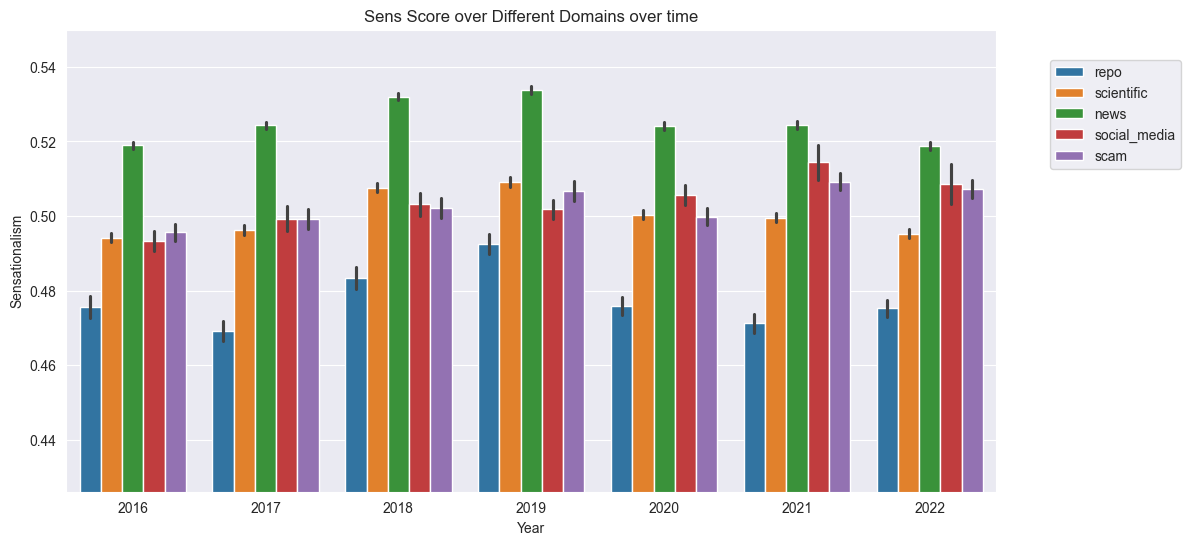

In [49]:
plt.figure(figsize=(12, 6))

sns_plot = sns.barplot(data=df, x = "year", y = "sensationalism_score", hue="label_voting_manual", hue_order=domain_order_for_hue)
plt.title("Sens Score over Different Domains over time")
plt.xlabel("Year")
plt.ylabel("Sensationalism")
plt.legend(title="Domain Category", loc="upper right", handles = sns_plot.get_legend_handles_labels()[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.legend(bbox_to_anchor=(1.05, .95), loc='upper left')
plt.ylim(0.426, .55)  # Set y-axis limits to show only the relevant range
plt.show()

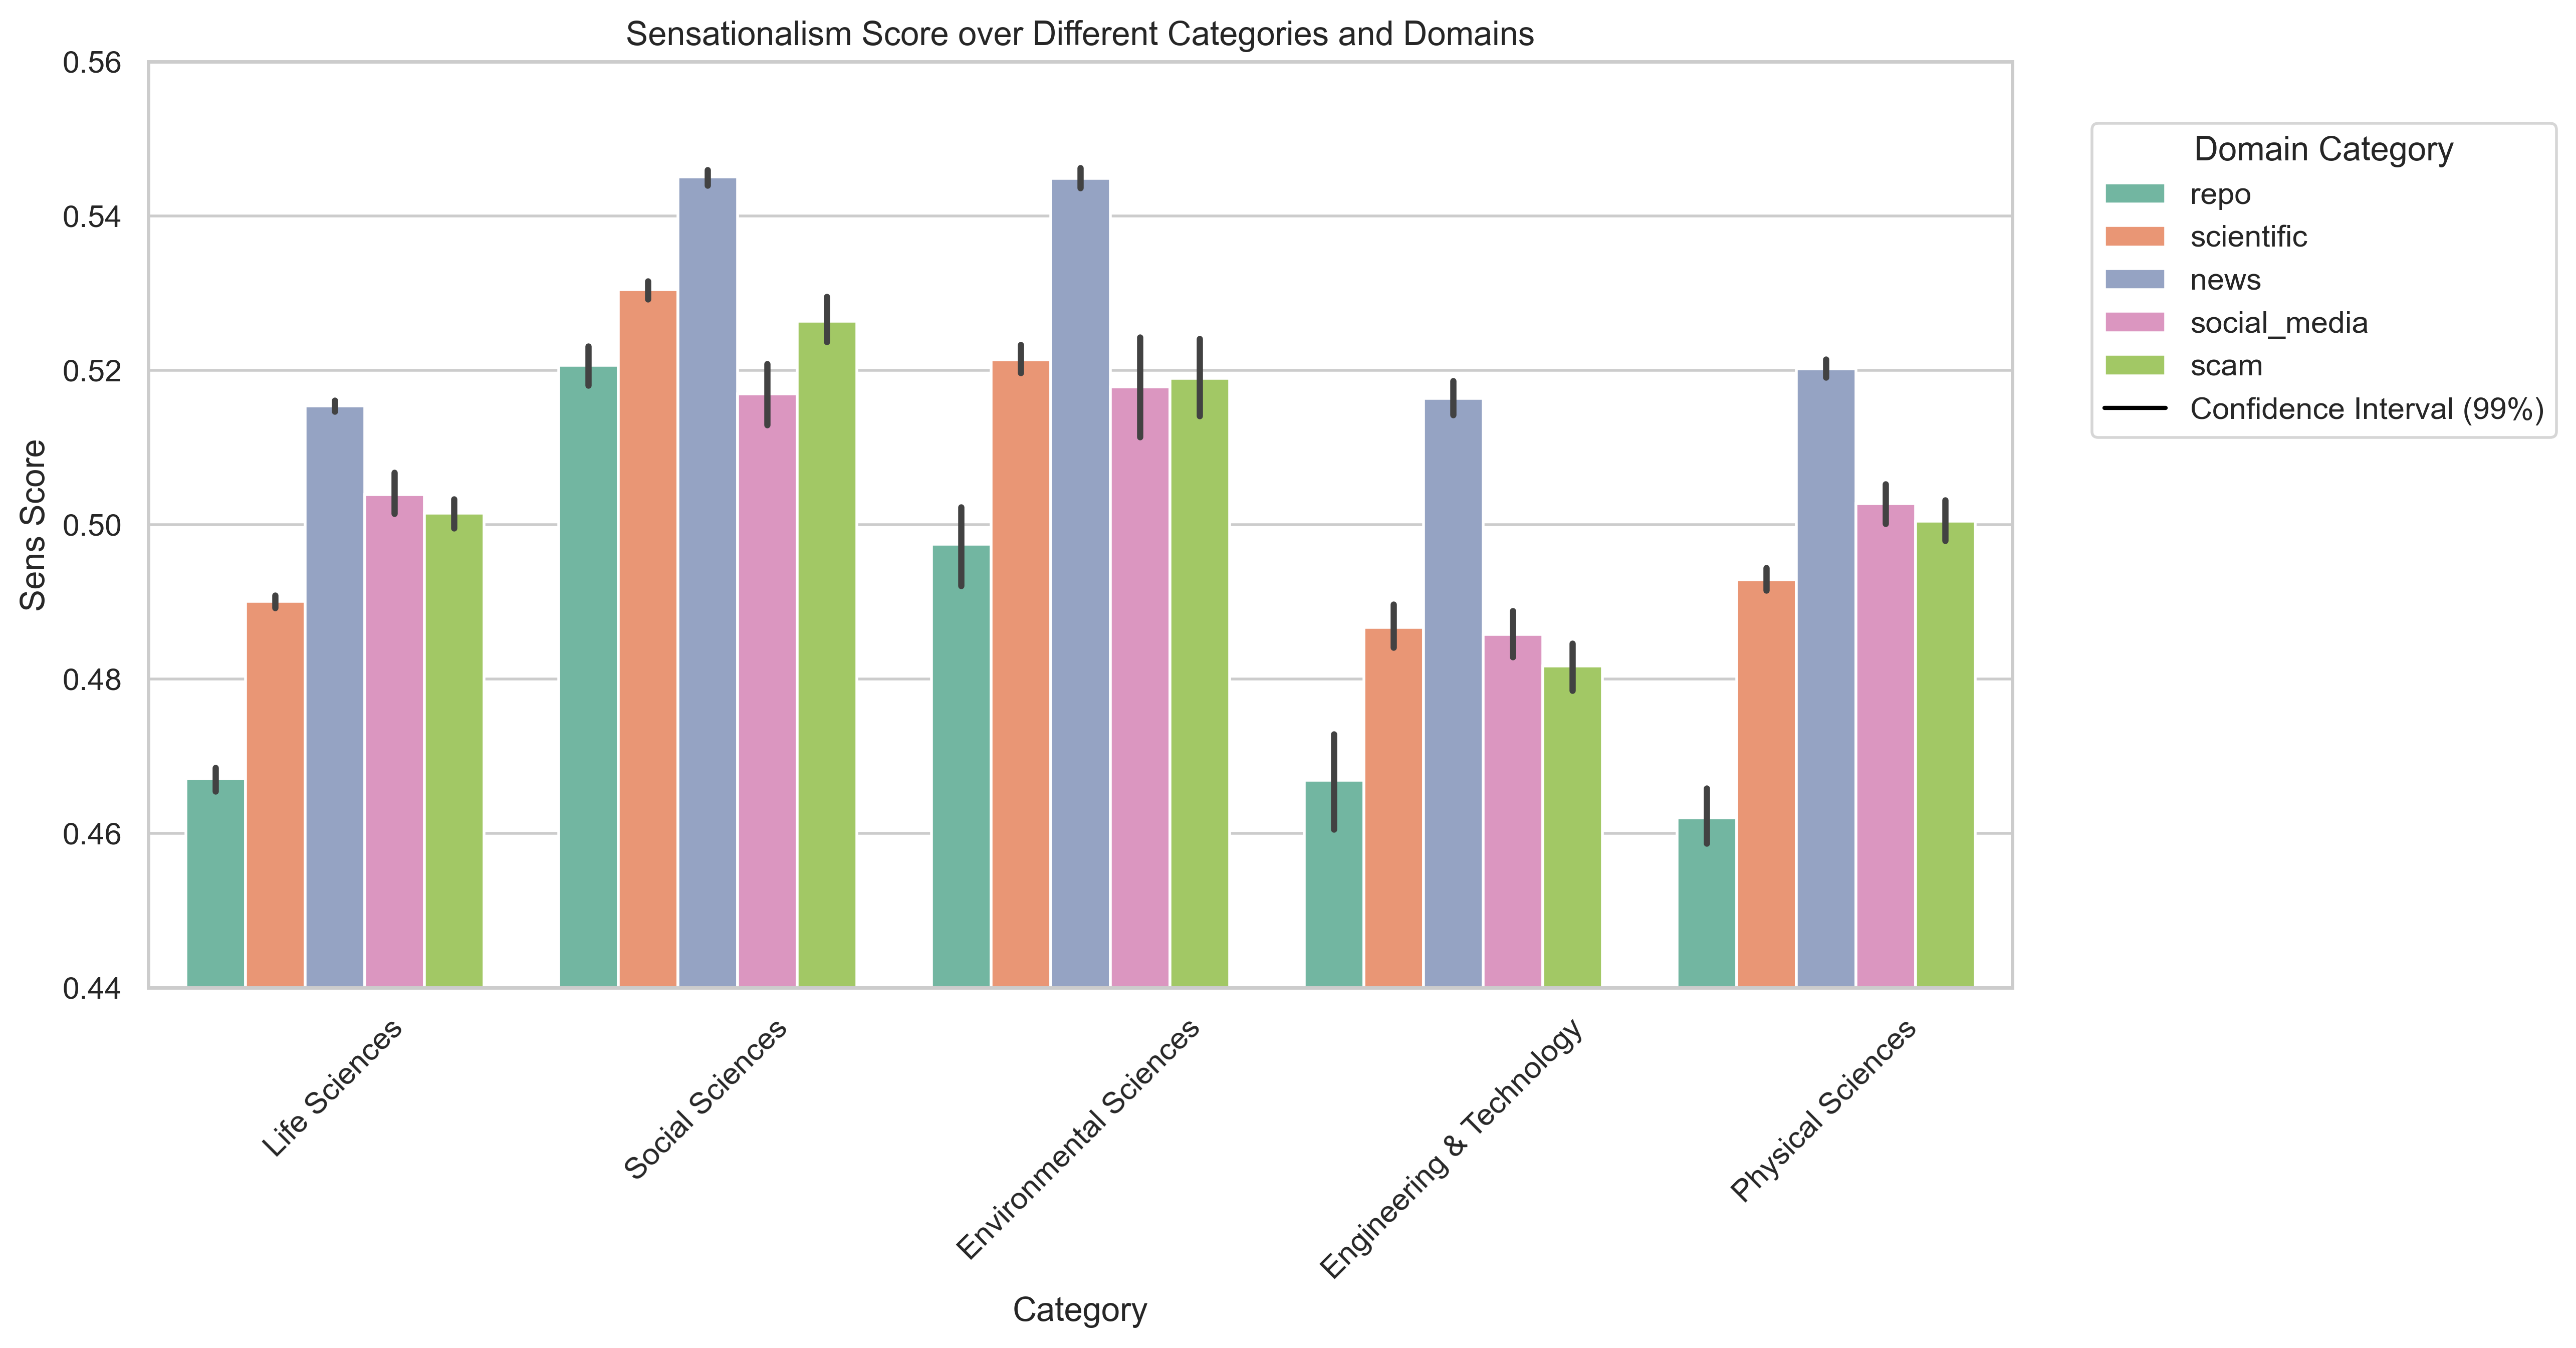

In [43]:
plt.figure(figsize=(12, 6))
sns_plot = sns.barplot(data=df, x="top_category", y="sensationalism_score", hue="label_voting_manual",  hue_order=["repo", "scientific", "news", "social_media", "scam"], order=top_categories_order, errorbar=("ci", 99), legend=True, palette='Set2')
plt.xticks(rotation=45)
handles = sns_plot.get_legend_handles_labels()
# add error bars for the 50th percentile to the legend
plt.legend(bbox_to_anchor=(1.3, .95), title="Domain Category", loc="upper right", handles = handles[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.title("Sensationalism Score over Different Categories and Domains")
plt.xlabel("Category")
plt.ylabel("Sens Score")
plt.ylim((0.44, 0.56))
plt.show()


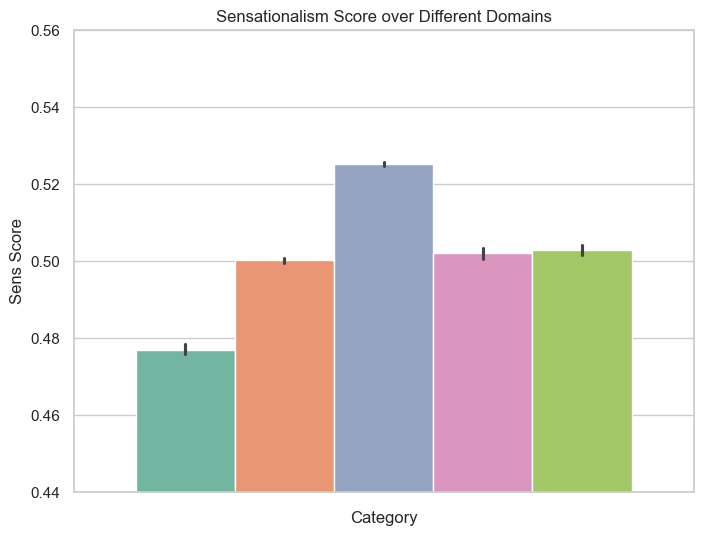

In [41]:
plt.figure(figsize=(8, 6))
sns_plot = sns.barplot(data=df, y="sensationalism_score", hue="label_voting_manual",  hue_order=["repo", "scientific", "news", "social_media", "scam"], errorbar=("ci", 99), legend=False, palette='Set2')
plt.xticks(rotation=45)
handles = sns_plot.get_legend_handles_labels()
# add error bars for the 50th percentile to the legend
#plt.legend(title="Domain Category", loc="upper right", handles = handles[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.title("Sensationalism Score over Different Domains")
plt.xlabel("Category")
plt.ylabel("Sens Score")
plt.ylim((0.44, 0.56))
plt.show()


News generally have more sensationalism than other domains. We also see that social sciences and environmental sciences have more sensationsalism than engieneering & technology and physical sciences

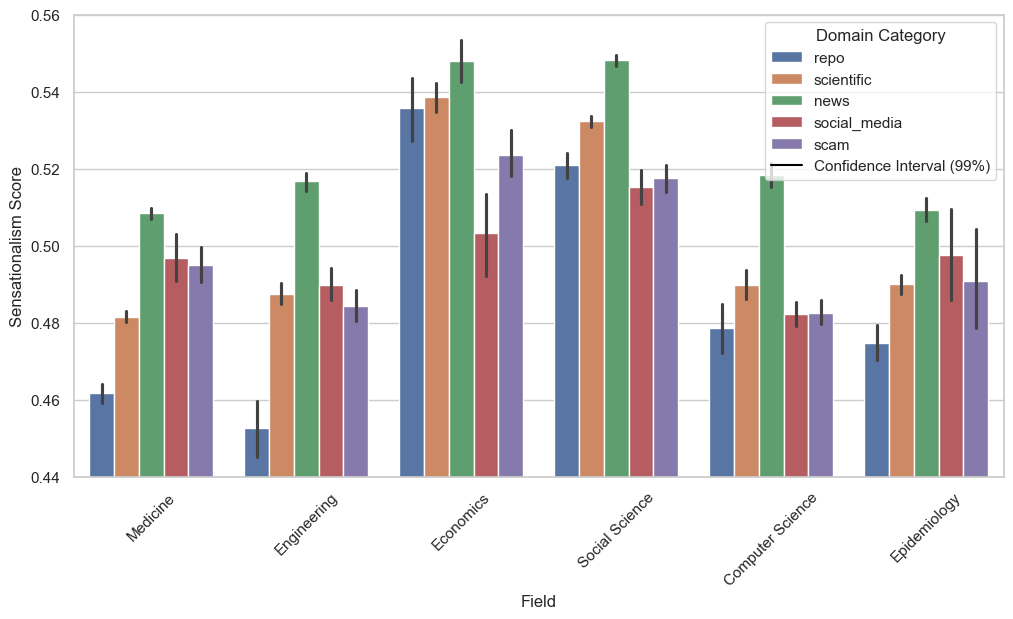

In [30]:

plt.figure(figsize=(12, 6))
sns_plot = sns.barplot(data=df[df["link_flair_text"].isin(selected_categories)], x="link_flair_text", y="sensationalism_score", hue="label_voting_manual",  hue_order=domain_order_for_hue, order=selected_categories, legend=True)
plt.legend(title="Domain Category", loc="upper right", handles = sns_plot.get_legend_handles_labels()[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.xticks(rotation=45)
plt.xlabel('Field')
plt.ylim((0.44, 0.56))
plt.ylabel('Sensationalism Score')
plt.show()

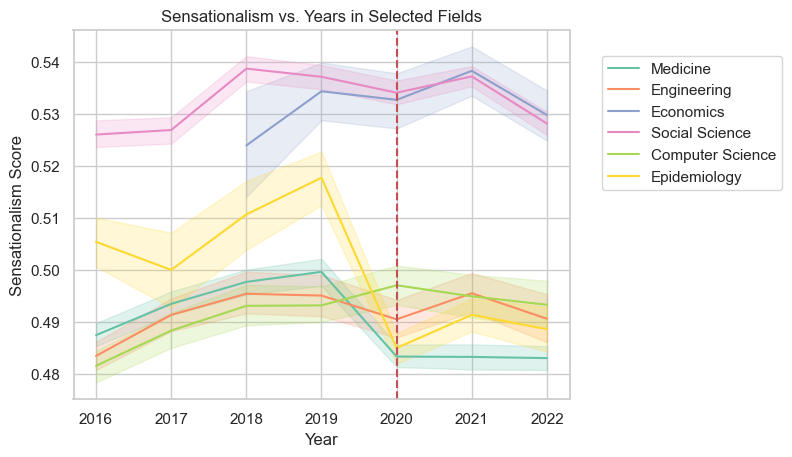

In [11]:
sns_plot = sns.lineplot(data=df, x="year", y="sensationalism_score", hue="link_flair_text", palette ="Set2", hue_order=selected_categories)
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left')
plt.axvline(x=2020, color='r', linestyle='--') # COVID year
plt.ylabel('Sensationalism Score')
plt.xlabel('Year')
plt.title('Sensationalism vs. Years in Selected Fields')
sns.set_theme(style="whitegrid")


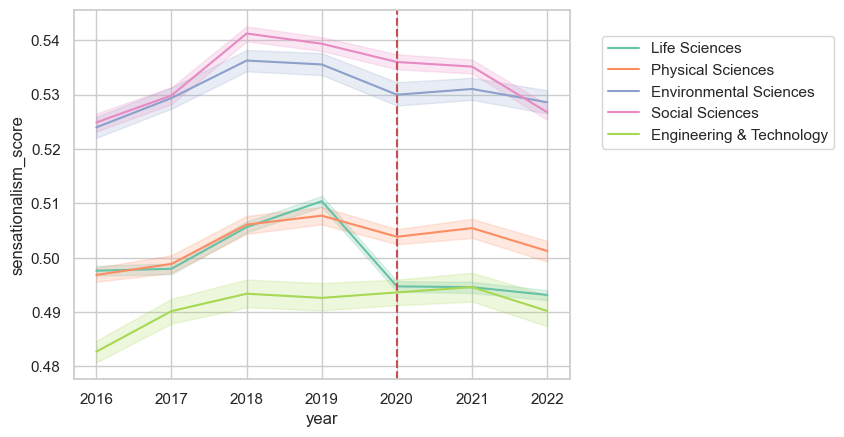

In [12]:
sns_plot = sns.lineplot(data=df, x="year", y="sensationalism_score", hue="top_category", palette ="Set2")
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left')
plt.axvline(x=2020, color='r', linestyle='--') # COVID year



We see a clear dip in 2020 (COVID?) and a slight rise again in 2021 across the board. Especially for epidemology and medicine there is a clear dip in 2020, which makes a lot of sense considering COVID and the need for clear and accurate information that does not spread panic (assuming that sensationalism may cause more panic/stress). 

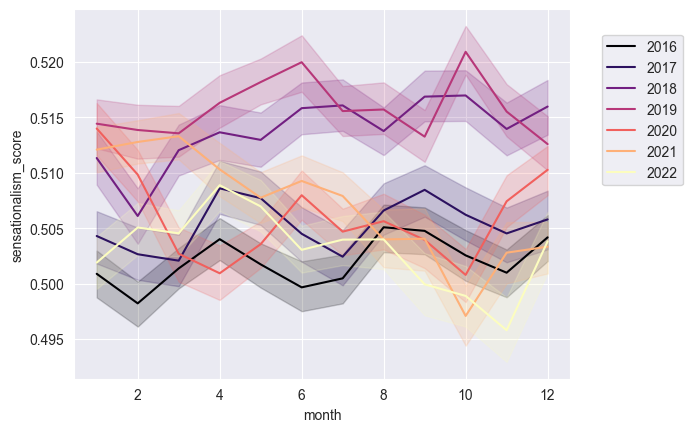

In [51]:
sns_plot = sns.lineplot(data=df, x="month", y="sensationalism_score", hue="year", palette="magma")

# place legend outside of box: https://www.statology.org/seaborn-legend-position/
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left')

Too high variance in the data to see a clear trend over the months. Seems to be slightly higher for 2018 and 2019?

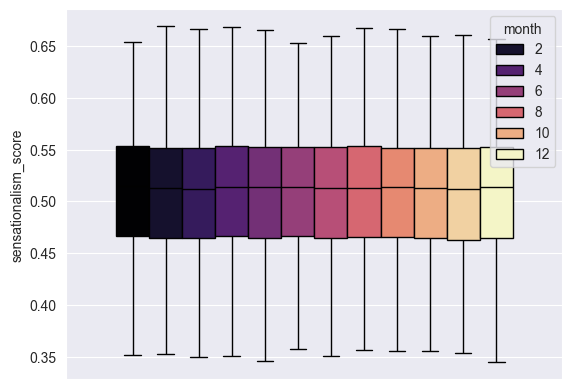

In [53]:
sns_plot = sns.boxplot(data=df, hue="month", y="sensationalism_score", palette="magma")


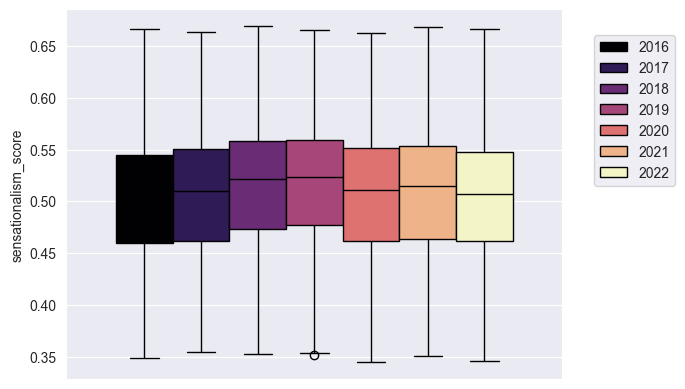

In [34]:
sns_plot = sns.boxplot(data=df, hue="year", y="sensationalism_score", palette="magma")

# place legend outside of box: https://www.statology.org/seaborn-legend-position/
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left')

Too high variance in the data to see a clear trend over the months. Seems to be slightly higher for 2018 and 2019?

In [36]:
yearly_averages = df.groupby("year")["sensationalism_score"].mean()
df["sens_norm_year"] = df.apply(
    lambda x : x["sensationalism_score"] - yearly_averages[x["year"]],
    axis=1
)

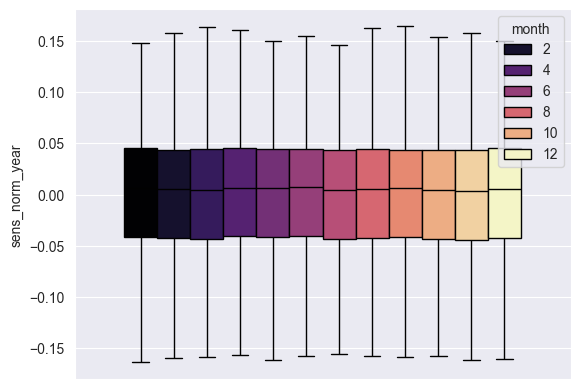

In [37]:
sns_plot = sns.boxplot(data=df, hue="month", y="sens_norm_year", palette="magma")


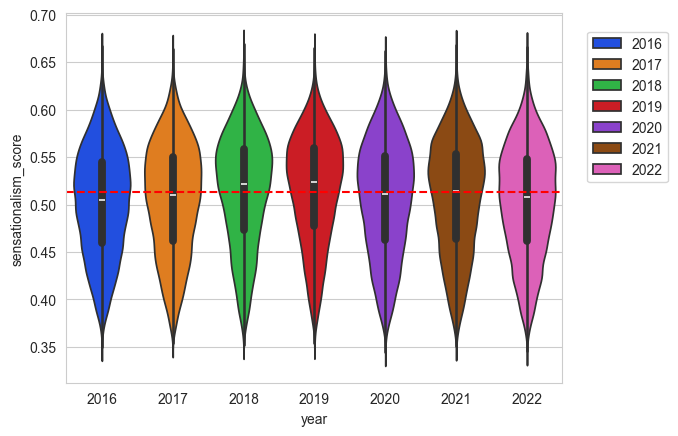

In [8]:
# Plot the distribution of sensationalism scores over the years
sns_plot = sns.violinplot(data=df, x="year", y="sensationalism_score", palette="bright", hue="year")
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left', borderaxespad=0.)
plt.axhline(df["sensationalism_score"].median(), color='r', linestyle='--')


Sensationalism seems to be consistent over the years, looking how most of the posts are distributed.

# Sensationalism over different categories.

In [9]:

average_sensationalism = df.groupby("top_category")["sensationalism_score"].mean().sort_values(ascending=False)
median_sensationalism = df.groupby("top_category")["sensationalism_score"].median().sort_values(ascending=False)
median_df = pd.DataFrame({
    "top_category": median_sensationalism.index,
    "median_sensationalism": median_sensationalism.values
})


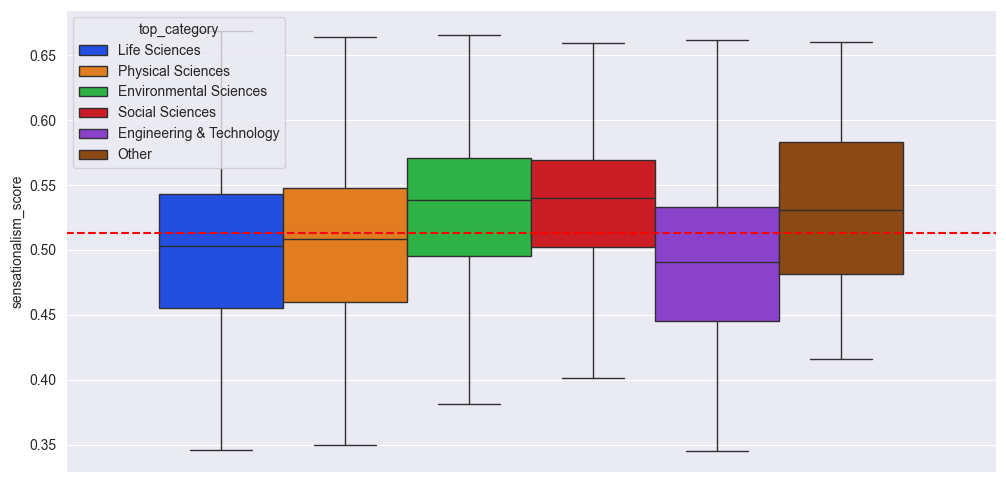

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,
                       #x="top_category",
                       y="sensationalism_score", 
                       palette="bright", 
                       hue="top_category", 
                       dodge=True, 
                        showfliers=False)
plt.xticks(rotation=45)
plt.axhline(df["sensationalism_score"].median(), color='r', linestyle='--')

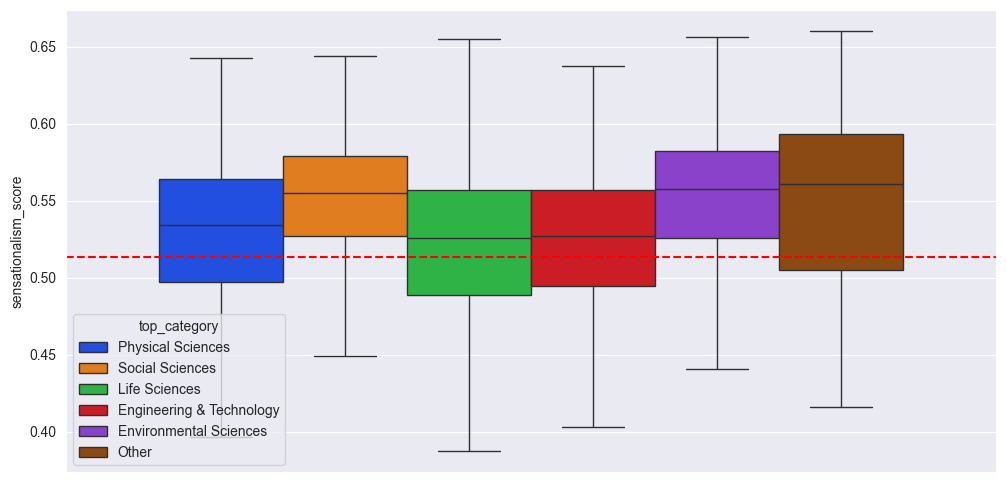

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["score"] >= 100],
                       #x="top_category",
                       y="sensationalism_score", 
                       palette="bright", 
                       hue="top_category",
                       dodge=True, 
                       showfliers=False)
plt.xticks(rotation=45)
plt.axhline(df["sensationalism_score"].median(), color='r', linestyle='--')

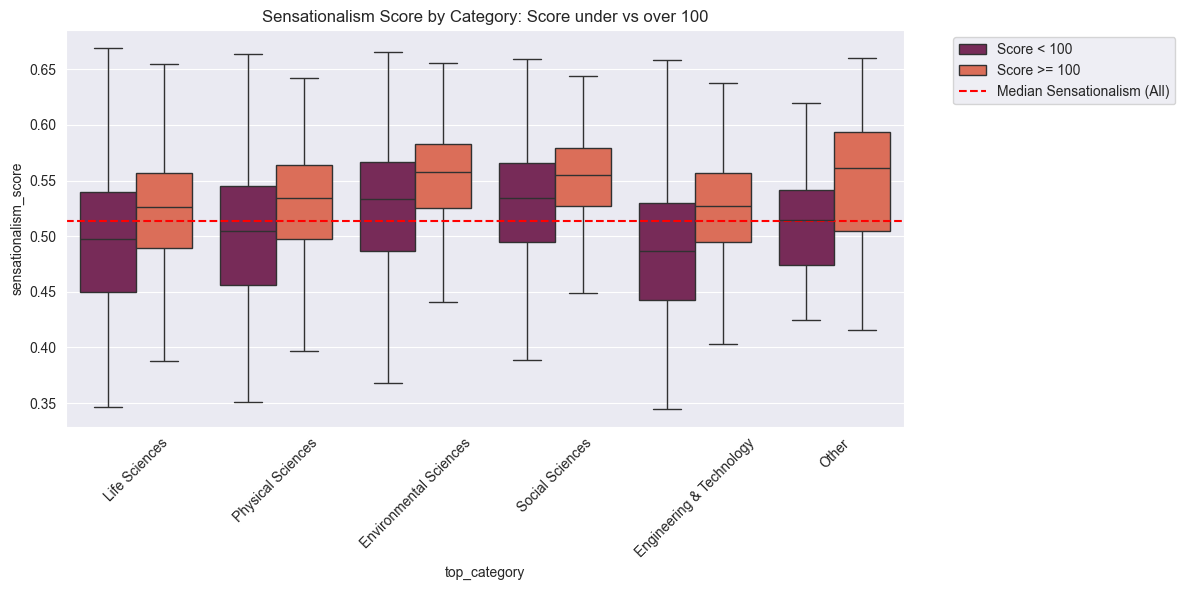

In [44]:
df_high_score = df[df["score"] >= 100].copy()
df_low_score = df[df["score"] < 100].copy()

df_high_score['dataset'] = 'Score >= 100'
df_low_score['dataset'] = 'Score < 100'

combined_df = pd.concat([df_low_score, df_high_score])

plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, 
            x="top_category", 
            y="sensationalism_score", 
            hue="dataset", 
            palette="rocket", 
            dodge=True, 
            showfliers=False
            )
plt.xticks(rotation=45)
plt.axhline(df["sensationalism_score"].median(), color='r', linestyle='--', label='Median Sensationalism (All)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Sensationalism Score by Category: Score under vs over 100")
plt.tight_layout()
plt.show()


Sensationalism is consistently higher for higher-scoring posts (defined as posts over 100 upvotes). This is consistent across all categories.

/var/folders/dr/xmdsvycs1g3dfskw1mj7syz00000gn/T/ipykernel_17546/4179613043.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(data=df, x="link_flair_text", y="sensationalism_score",  order=average_jargon.index, palette="rocket")
/var/folders/dr/xmdsvycs1g3dfskw1mj7syz00000gn/T/ipykernel_17546/4179613043.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


<Axes: title={'center': 'Sensationalism by Reddit Category'}, xlabel='Category', ylabel='Sensationalism'>

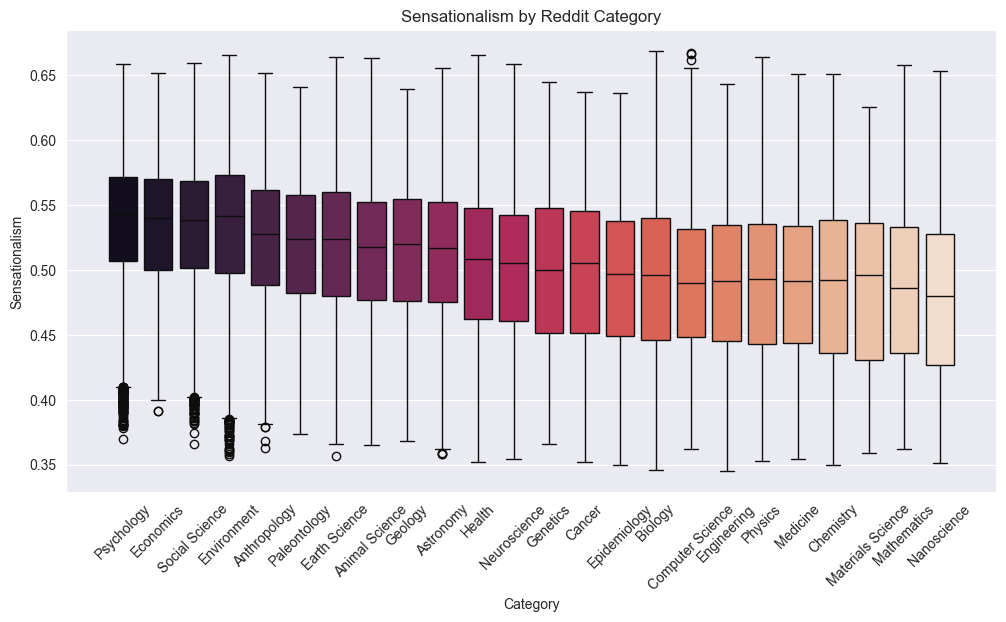

In [62]:
plt.figure(figsize=(12, 6))
average_jargon = df.groupby("link_flair_text")["sensationalism_score"].mean().sort_values(ascending=False)
median_jargon = df.groupby("link_flair_text")["sensationalism_score"].median().sort_values(ascending=False)
median_df = pd.DataFrame({
    "link_flair_text": median_jargon.index,
    "median_sens": median_jargon.values
})

plot = sns.boxplot(data=df, x="link_flair_text", y="sensationalism_score",  order=average_jargon.index, palette="rocket")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.title("Sensationalism by Reddit Category")
# add legend for error
plt.xlabel("Category")
plt.ylabel("Sensationalism")
# add a dot for the median in this
sns.scatterplot(data=median_df, x="link_flair_text", y="median_sens", s=10, hue="link_flair_text", palette="rocket_r", legend=False)

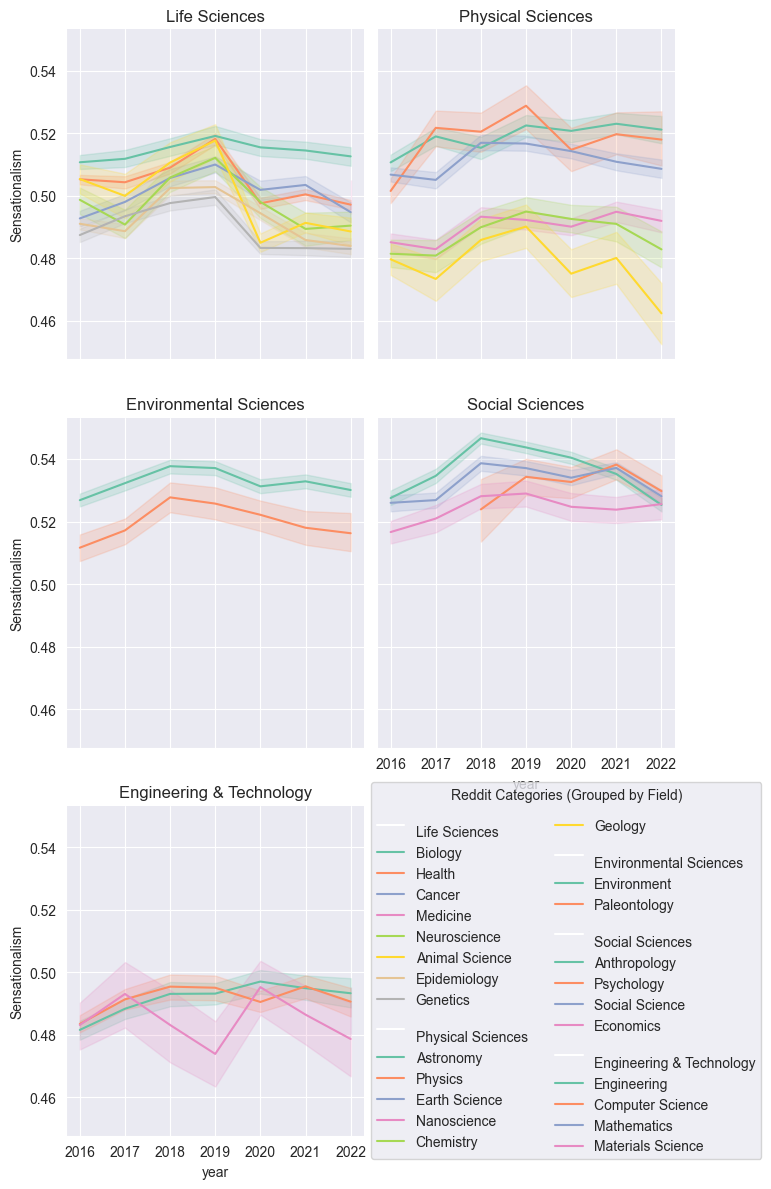

In [63]:
g = sns.FacetGrid(df, col="top_category", col_wrap=2, height=4, sharey=True)

def plot_table(data, color, **kwargs):
    average_jargon = data.groupby("link_flair_text")["sensationalism_score"].mean().sort_values(ascending=False)
    top_category = data["top_category"].iloc[0]
    palette = sns.color_palette("Set2", len(average_jargon))
    sns_plot = sns.lineplot(data=data, x="year", y="sensationalism_score", hue="link_flair_text", **kwargs, legend=False, palette=palette,hue_order=average_jargon.index)
    sns_plot.legend(title=top_category, loc="upper right", handles = [ plt.Line2D([], [], color=palette[i], label=flair) for (i, flair) in enumerate(average_jargon.index)])
    sns_plot.set_title(top_category)
    plt.ylabel("Sensationalism")



g.map_dataframe(plot_table)
unique_top_categories = df["top_category"].unique()
# Create a custom legend
handles = []
for i, cat in enumerate(unique_top_categories):
    flairs = df[df["top_category"] == cat]["link_flair_text"].unique()
    handles.append(plt.Line2D([], [], color="white", label=f"\n{cat}"))
    palette = sns.color_palette('Set2', len(flairs))
    for i, flair in enumerate(flairs):
        handles.append(
            plt.Line2D([], [], color=palette[i], label=flair)
        )

plt.legend(handles=handles, title="Reddit Categories (Grouped by Field)", loc="center left", bbox_to_anchor=(1, 0.5), ncol=2)
plt.subplots_adjust(right=0.85)

# Sensationalisms correlation with score

Plot showing the distribution of sensationalism score over the log-scaled score of the posts.

/var/folders/dr/xmdsvycs1g3dfskw1mj7syz00000gn/T/ipykernel_17546/2478983011.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


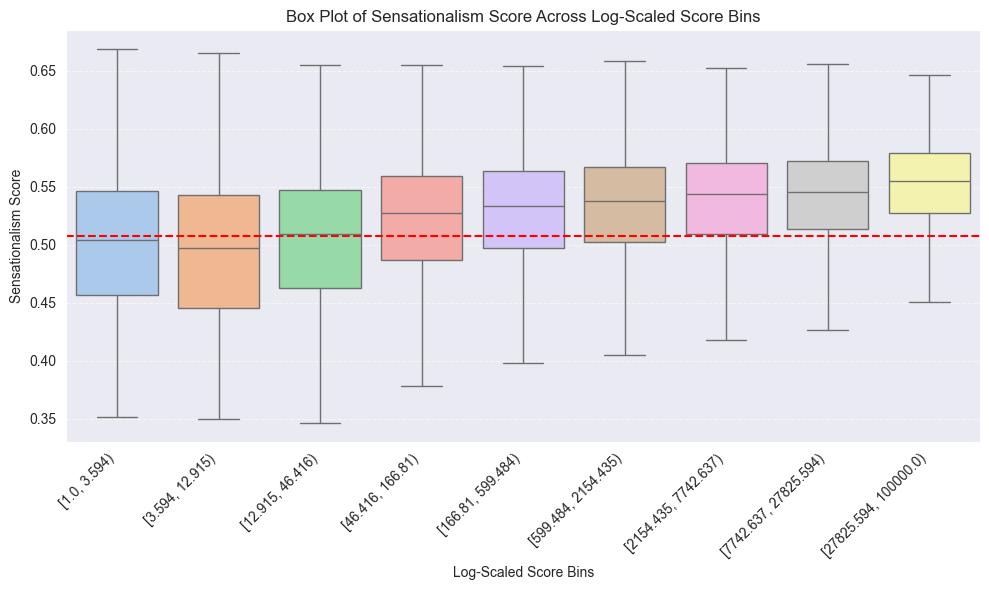

In [64]:
df['score_bin'] = pd.cut(df['score'], bins=np.logspace(0, 5, num=10), right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x='score_bin',
            y='sensationalism_score',
            palette='pastel',
            showfliers=False,
            # hue='top_category'
            )
plt.title('Box Plot of Sensationalism Score Across Log-Scaled Score Bins')
plt.xlabel('Log-Scaled Score Bins')
plt.ylabel('Sensationalism Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.axhline(df['sensationalism_score'].mean(), color='r', linestyle='--')
plt.tight_layout()
plt.show()

The score is log-scaled to better visualize the "bracket" of score that the postts fall into, from very low on the left, to very high on the right. Each bracket is a log-scaled bin of the score.

From reading this plot we can see that higher scores have less variance in the sensationalism score, while also having a higher average sensationalism score.

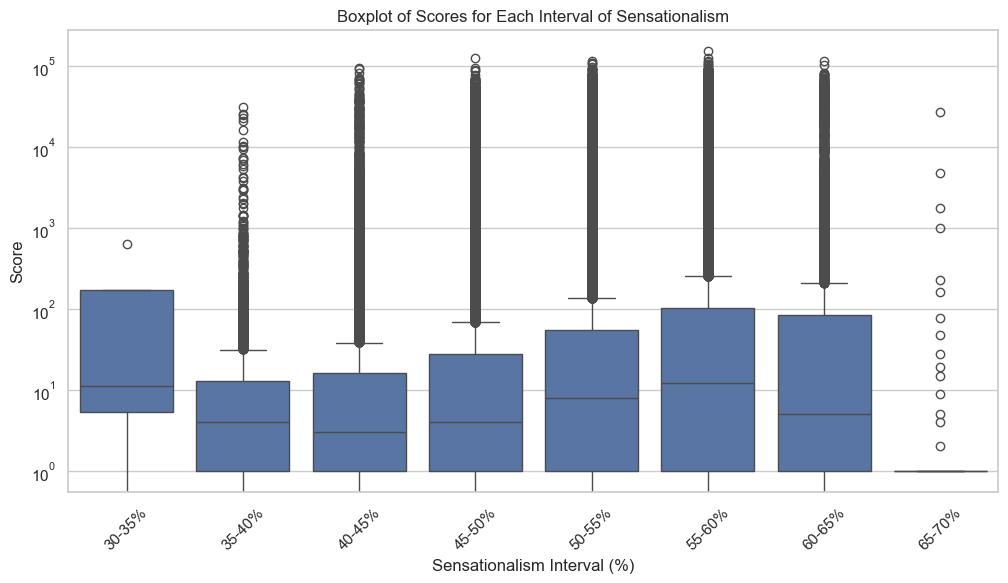

In [46]:
bins = [30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ['30-35%', '35-40%', '40-45%', '45-50%', '50-55%', '55-60%', '60-65%', '65-70%']

# Create the sens_interval column with intervals closed on the left
df['sens_interval'] = pd.cut(df['sensationalism_score'] * 100, bins=bins, labels=labels, right=False)

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sens_interval', y='score')
plt.title('Boxplot of Scores for Each Interval of Sensationalism')
plt.xlabel('Sensationalism Interval (%)')
plt.ylabel('Score')
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

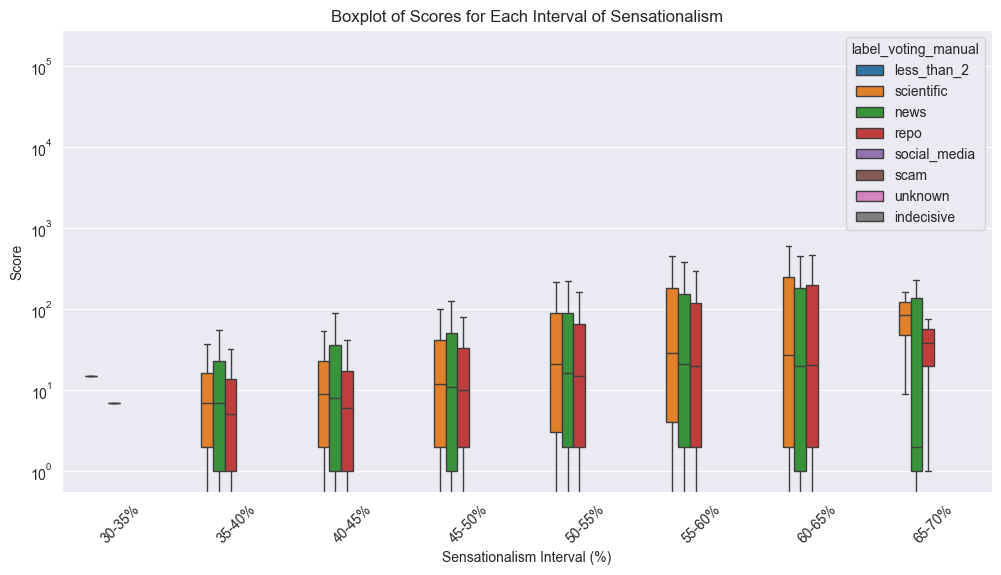

In [4]:
bins = [30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ['30-35%', '35-40%', '40-45%', '45-50%', '50-55%', '55-60%', '60-65%', '65-70%']

# Create the sens_interval column with intervals closed on the left
df['sens_interval'] = pd.cut(df[df['label_voting_manual'].isin(['repo', 'scientific', 'news'])]['sensationalism_score'] * 100, bins=bins, labels=labels, right=False)

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sens_interval', y='score', hue='label_voting_manual', fliersize=0)
plt.title('Boxplot of Scores for Each Interval of Sensationalism')
plt.xlabel('Sensationalism Interval (%)')
plt.ylabel('Score')
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

Even for the less_than_2 category, which mostly correlates to scam, this seems effective.
Apart from that the effect seems similar over all domains

Text(0.5, 33.281249999999986, 'Sensationalism Score')

<Figure size 1200x600 with 0 Axes>

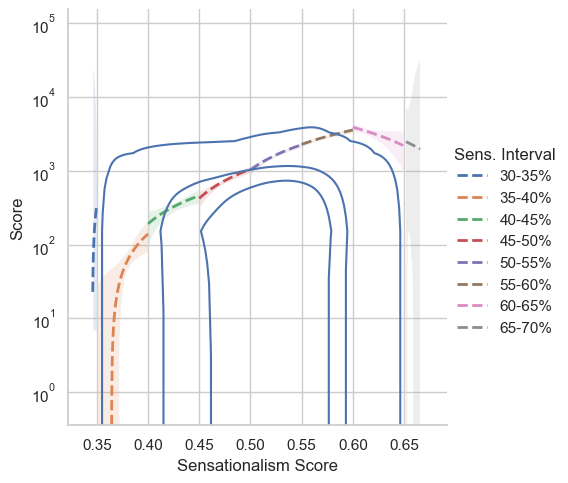

In [59]:
plt.figure(figsize=(12,6))
line_kws = {'linestyle': '--', 'linewidth': 2}
sns_plot = sns.lmplot(df[df['score'] > 1], x= "sensationalism_score", y = "score", hue='sens_interval', scatter=False, line_kws=line_kws, legend=False)
sns.kdeplot(df, x= "sensationalism_score", y = "score", legend=False, levels=4)
sns_plot.add_legend(title='Sens. Interval')
plt.yscale('log')
plt.ylabel('Score')
plt.xlabel('Sensationalism Score')

In [1]:
sns.kdeplot(df, x="sensationalism_score")

NameError: name 'sns' is not defined

Text(0.5, 29.140624999999986, 'Sensationalism')

<Figure size 1200x600 with 0 Axes>

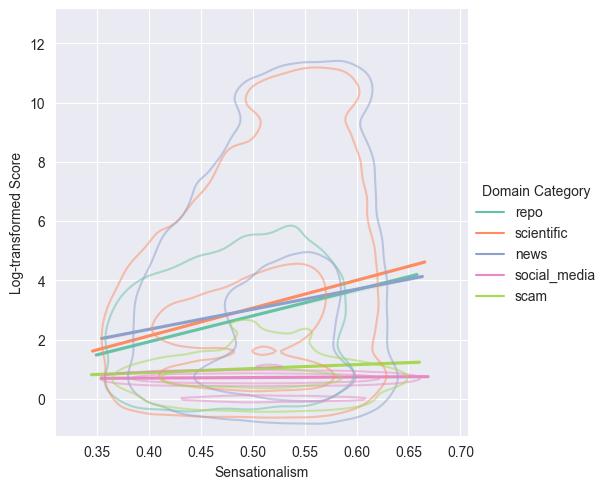

In [66]:
plt.figure(figsize=(12, 6))
sns_plot = sns.lmplot(data=df, x="sensationalism_score", y="log_score", hue="label_voting_manual", hue_order=domain_order_for_hue, legend=False, palette='Set2', scatter=False)
sns.kdeplot(data=df, x="sensationalism_score", y="log_score", levels=3, alpha=0.5, legend=False, hue_order=domain_order_for_hue, hue="label_voting_manual", palette='Set2')
handles = [plt.Line2D([], [], color=sns.color_palette('Set2', len(domain_order_for_hue))[i], label=domain) for i, domain in enumerate(domain_order_for_hue)]
sns_plot.add_legend(title="Domain Category", handles=handles)
plt.ylabel("Log-transformed Score")
plt.xlabel("Sensationalism")


Text(0.5, 33.281249999999986, 'Sensationalism')

<Figure size 1200x600 with 0 Axes>

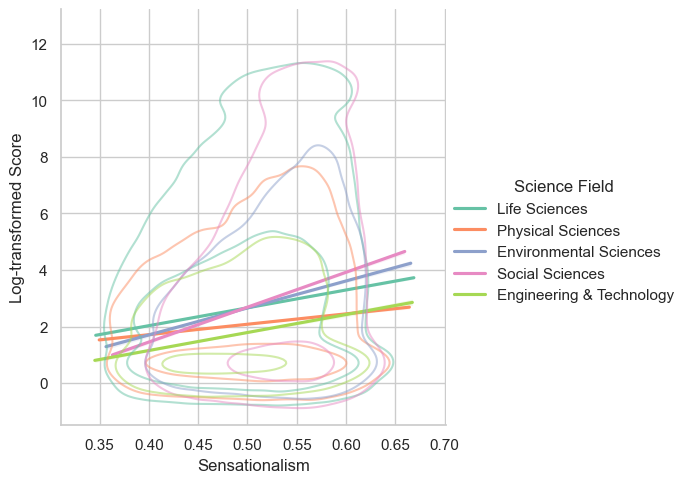

In [63]:
plt.figure(figsize=(12, 6))
sns_plot = sns.lmplot(data=df, x="sensationalism_score", y="log_score", hue="top_category", palette='Set2', scatter=False, legend=False)

sns.kdeplot(data=df, x="sensationalism_score", y="log_score", levels=3, alpha=0.5, legend=False, hue="top_category", palette='Set2')
sns_plot.add_legend(title='Science Field')
plt.ylabel("Log-transformed Score")
plt.xlabel("Sensationalism")


# Linear regression